# Anàlisi de les dades
## Nota sobre les limitacions de l'anàlisi 
Les dades obtingudes poden contenir errors deguts a:
- Errors en la recollida de dades a causa d'erros humans
- Errors en la classificació de les dades a causa d'errors informàtics
No es realitzarà una comprovació de les dades a causa de la magnitud de l'estudi i l'objectiu de l'anàlisi.
Tanmateix, en les conclusións de cada anàlisi es tindran en compte aquestes limitacions.

## Objectiu de l'anàlisi
TODO: Afegir objectiu de l'anàlisi

## Importació de llibreries i funcions pròpies

In [6]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from auxiliary_functions import test_indepe_plot, test_indepe_bin_plot, comptatge_i_percentatge_cat, mitjana_i_std_num
from listas import num_var, cat_var, num_tests, cat_tests

## Càrrega de les dades
Les dades s'han tractat prèviament amb l'script 'process_database.py' i s'han guardat en un dataframe de Pandas. Aquestes dades contenen la informació de tots els pacients de l'estudi.

In [7]:
taula = pd.read_pickle('./data/processed/dataframe.pkl')

## Segmentació de les dades
Distribuiré les dades en 3 grups (més un grup que conté la totalitat de dades):
- **AMB_PA**: aquest grup està compost per pacients que contenen el codi ICD de pneumònia aspirativa al seu historial.
- **AMB_PA_MECVV**: aquest grup conté els pacients que compleixen les següents característiques: 
    - Han donat positiu al MECVV (és a dir, que tenen disfàgia i una alteració en la seguretat o en l'eficàcia)
    - Han sigut diagnosticats amb el codi ICD de pneumònia
    - Han passat menys de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu al MECVV
- **SENSE_PA**: aquest grup està format per pacients que contenen el codi ICD de pneumònia o bé:
    - Contenen el codi ICD de pneumònia
    - Han donat positiu al MECVV 
    - Han passat més de 30 dies entre el diagnòstic amb l'ICD de pneumònia i el resultat positiu del MECVV 
- **TOTAL**: aquest grup conté tots els pacients de l'estudi

### AMB_PA 

In [8]:
AMB_PA = taula[taula["PA diagnosticada"] == 1.0]
AMB_PA.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Malaltia renal crònica
0,89,0,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,None,2020-06-18,NaN,Dependència total,Desconegut,Risc moderat,Desconegut,0
1,70,1,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,None,None,16.3,2022-09-29,NaN,Dependència severa,Desconegut,Risc baix,Desconegut,0
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0
6,101,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,None,2021-08-17,2.0,Dependència total,Desconegut,Risc moderat,Desconegut,0
12,86,1,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '46.4', 'data': '2020-09-09'}]","[{'codi': 'G04CA', 'dataInici': '2020-09-04 00...","[{'data': '20200907110400', 'disfagia': 'S', '...",...,46.4,0.0,0.0,2020-09-04,3.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0


# AMB_PA_MECVV

In [9]:
AMB_PA_MECVV = taula[
    (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] < 30)] 
AMB_PA_MECVV.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Malaltia renal crònica
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0
6,101,0,0,[],[],"[{'activitat': '3', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'C09AA', 'dataInici': '2021-08-21 00...","[{'data': '20210819124116', 'disfagia': 'S', '...",...,None,None,None,2021-08-17,2.0,Dependència total,Desconegut,Risc moderat,Desconegut,0
12,86,1,0,[],[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '46.4', 'data': '2020-09-09'}]","[{'codi': 'G04CA', 'dataInici': '2020-09-04 00...","[{'data': '20200907110400', 'disfagia': 'S', '...",...,46.4,0.0,0.0,2020-09-04,3.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0
27,100,1,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2021-09-14'}, {'valor...","[{'codi': 'C08CA', 'dataInici': '2020-11-23 00...","[{'data': '20201125131827', 'disfagia': 'S', '...",...,None,None,41.1,2020-12-02,7.0,Dependència total,Desconegut,Risc moderat,Desconegut,0
28,95,0,0,"[{'date': '20220526', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],"[{'valor': '0', 'data': '2022-05-30'}]","[{'codi': 'C10AA', 'dataInici': '2020-11-18 00...","[{'data': '20220529115841', 'disfagia': 'S', '...",...,0,0.0,0.0,2022-05-23,6.0,Dependència total,Desconegut,Risc moderat,Desconegut,0


# SENSE_PA

In [10]:
SENSE_PA = taula[
           (taula["Dies entre primer ICD pneumònia i primer MECVV positiu"] > 30) & 
           (taula['P diagnosticada'] == 1.0)]
SENSE_PA.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Malaltia renal crònica
13,71,0,0,"[{'date': '20220216', 'name': 'CULTIU Esput', ...",[],"[{'activitat': '3', 'estatMental': '0', 'humit...","[{'dataValoracio': '2020-09-06', 'horaValoraci...",[],"[{'codi': 'C10AA', 'dataInici': '2020-09-06 00...","[{'data': '20200906175506', 'disfagia': 'N', '...",...,None,None,None,2022-02-14,525.0,Dependència severa,Desconegut,Risc moderat,Dèficit neurologic moderat,0
25,83,0,0,"[{'date': '20220308', 'name': 'UREA Sèrum', 'l...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '0', 'estatMental': '1', 'humit...",[],"[{'valor': '57', 'data': '2022-11-03'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2022-09-27 00...","[{'data': '20220929091303', 'disfagia': 'S', '...",...,None,None,-6.2,2023-04-09,192.0,Dependència moderada,Malnodrit,Risc baix,Desconegut,0
31,89,1,0,"[{'date': '20220318', 'name': 'BILIRUBINA TOTA...","[{'imc': '', 'anorexia': '', 'perduaPes': '', ...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '75', 'data': '2022-01-11'}, {'valo...","[{'codi': 'C10AA', 'dataInici': '2021-12-23 00...","[{'data': '20220119101523', 'disfagia': 'N', '...",...,None,None,8.0,2023-05-05,458.0,Dependència moderada,Malnodrit,Risc moderat,Desconegut,0
39,87,0,0,"[{'date': '20230619', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'N02BE', 'dataInici': '2021-01-17 00...","[{'data': '20220111085147', 'disfagia': 'S', '...",...,None,None,None,2023-06-19,524.0,Dependència severa,Desconegut,Risc baix,Desconegut,0
41,93,0,0,"[{'date': '20221013', 'name': 'GLUCOSA Sèrum',...",[],"[{'activitat': '1', 'estatMental': '1', 'humit...",[],"[{'valor': '0', 'data': '2023-06-02'}, {'valor...","[{'codi': 'C10AA', 'dataInici': '2021-02-05 00...","[{'data': '20230530155654', 'disfagia': 'S', '...",...,0,0.0,-60.0,2023-03-21,70.0,Dependència severa,Desconegut,Risc baix,Desconegut,0


# TOTAL

In [11]:
TOTAL = taula
taula.head()

,edat,sexe M,visitaDietista,labs,mna,emina,canadenca,pes,atcs,mecvvs,...,Pes coincident primer MECVV,Pèrdua pes entre ingressos,Pèrdua pes total,Data més antiga pneumònia,Dies entre primer ICD pneumònia i primer MECVV positiu,Barthel categòric,MNA categòric,EMINA categòric,Canadenca categòrica,Malaltia renal crònica
0,89,0,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'M01AE', 'dataInici': '2020-06-21 00...",[],...,None,None,None,2020-06-18,NaN,Dependència total,Desconegut,Risc moderat,Desconegut,0
1,70,1,0,"[{'date': '20220524', 'name': 'PCR SARS-CoV2 S...",[],"[{'activitat': '0', 'estatMental': '0', 'humit...",[],"[{'valor': '64.7', 'data': '2022-10-04'}, {'va...","[{'codi': 'C09AA', 'dataInici': '2021-05-26 00...","[{'data': '20220930', 'pacientNoColabora': '',...",...,None,None,16.3,2022-09-29,NaN,Dependència severa,Desconegut,Risc baix,Desconegut,0
2,96,1,0,[],[],"[{'activitat': '3', 'estatMental': '0', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-09 00...",[],...,None,None,None,2020-07-08,NaN,Dependència severa,Desconegut,Risc moderat,Desconegut,0
3,85,1,0,[],[],"[{'activitat': '2', 'estatMental': '1', 'humit...",[],[],"[{'codi': 'G04CA', 'dataInici': '2020-07-15 00...","[{'data': '20201204131810', 'disfagia': 'S', '...",...,None,None,None,2020-12-02,2.0,Dependència severa,Desconegut,Risc moderat,Desconegut,0
4,93,1,0,"[{'date': '20220208', 'name': 'UREA Sèrum', 'l...","[{'imc': '0', 'anorexia': '1', 'perduaPes': '1...","[{'activitat': '2', 'estatMental': '1', 'humit...",[],"[{'valor': '49.900', 'data': '2022-06-02'}, {'...","[{'codi': 'N02AA', 'dataInici': '2022-02-01 00...","[{'data': '20220330172303', 'disfagiaConeguda'...",...,None,None,0.0,2022-08-07,NaN,Dependència total,Malnodrit,Risc moderat,Desconegut,0


Ara que tinc totes les dades classificades en aquests grups, faré una descriptiva. També compararé els diferents grups amb el p-valor mitjançant T-test, test de Mann-Whitney o test Xi-quadrat per mirar la seva distribució, la qual esperaré que sigui similar entre el grup AMB_PA i AMB_PA_MECVV, i diferent entre SENSE_PA i els altres 2 grups. Els criteris que seguiré per utilitzar un test o un altre és, primer, fer un test de Shapiro-Wilk per comprovar si segueixen una distribució normal, si és així, usaré el T-test, si no, utilitzaré el de Mann-Whitney. Finalment, si la columna conté valors categòrics com és el cas del sexe (F/M), faré servir el test Xi-quadrat.


# Anàlisi descriptiva de les dades

### Comptatge i percentatge de variables categòriques per grup

#### AMB_PA

In [ ]:
comptatge_i_percentatge_cat(AMB_PA, cat_var)

#### AMB_PA_MECVV

In [ ]:
comptatge_i_percentatge_cat(AMB_PA_MECVV, cat_var)

#### SENSE_PA

In [ ]:
comptatge_i_percentatge_cat(SENSE_PA, cat_var)

#### TOTAL

In [ ]:
comptatge_i_percentatge_cat(TOTAL, cat_var)

####

### Comptatge i percentatge de tests categòrics per grup

#### AMB_PA

In [ ]:
comptatge_i_percentatge_cat(AMB_PA, cat_tests)

#### AMB_PA_MECVV

In [ ]:
comptatge_i_percentatge_cat(AMB_PA_MECVV, cat_tests)

#### SENSE_PA 

In [ ]:
comptatge_i_percentatge_cat(SENSE_PA, cat_tests)

#### TOTAL

In [ ]:
comptatge_i_percentatge_cat(TOTAL, cat_tests)

### Mitjanes i desviacions estàndard de variables numèriques per grup

#### AMB_PA

In [ ]:
mitjana_i_std_num(AMB_PA, num_var)

#### AMB_PA_MECVV

In [ ]:
mitjana_i_std_num(AMB_PA_MECVV, num_var)

#### SENSE_PA

In [ ]:
mitjana_i_std_num(SENSE_PA, num_var)

#### TOTAL

In [ ]:
mitjana_i_std_num(TOTAL, num_var)

### Mitjanes i desviacions estàndard dels tests numèrics per grup

#### AMB PA

In [ ]:
mitjana_i_std_num(AMB_PA, num_tests)

#### AMB_PA_MECVV

In [ ]:
mitjana_i_std_num(AMB_PA_MECVV, num_tests)

#### SENSE_PA

In [ ]:
mitjana_i_std_num(SENSE_PA, num_tests)

#### TOTAL

In [ ]:
mitjana_i_std_num(TOTAL, num_tests)

## Nombre de pacients

In [ ]:
num_AMB_PA = len(AMB_PA)
num_AMB_PA_MECVV= len(AMB_PA_MECVV)
num_SENSE_PA = len(SENSE_PA)
num_TOTAL = len(TOTAL)

print("Nombre de pacients amb pneumònia aspirativa (cie = J69.0):", num_AMB_PA)
print("Nombre de pacients amb pneumònia i un MECV-V positiu:", num_AMB_PA_MECVV)
print("Nombre de pacients amb pneumònia sense comptar amb cie J69.0:", num_SENSE_PA)
print("Nombre total de pacients:", num_TOTAL)

#### Comparació distributiva

##### Test d'independència

No es pot calcular la normalitat perquè només hi ha un valor per grup i tampoc té sentit calcular el p-valor.  

## Edat

In [ ]:
edat_AMB_PA = AMB_PA['edat'].mean()
desviacio_estandard_edat = AMB_PA['edat'].std()

resultat = f"{edat_AMB_PA:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)


In [ ]:
edat_AMB_PA_MECVV = AMB_PA_MECVV['edat'].mean()
desviacio_estandard_edat = AMB_PA_MECVV['edat'].std()

resultat = f"{edat_AMB_PA_MECVV:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

In [ ]:
edat_SENSE_PA = SENSE_PA['edat'].mean()
desviacio_estandard_edat = SENSE_PA['edat'].std()

resultat = f"{edat_SENSE_PA:.2f} ± {desviacio_estandard_edat:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

In [ ]:
edat_TOTAL = TOTAL['edat'].mean()
desviacio_estandard_TOTAL = TOTAL['edat'].std()

resultat = f"{edat_TOTAL:.2f} ± {desviacio_estandard_TOTAL:.2f}"
print("Mitjana ± Desviació Estàndard de l'edat:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor --> Test d'independència

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['edat'], 'AMB_PA_MECVV': AMB_PA_MECVV['edat'], 'SENSE_PA': SENSE_PA['edat'], 'TOTAL': TOTAL['edat']})

## Sexe

In [ ]:
sexe_AMB_PA = AMB_PA['sexe'].value_counts()
sexe_AMB_PA_MECVV = AMB_PA_MECVV['sexe'].value_counts()
sexe_SENSE_PA = SENSE_PA['sexe'].value_counts()
sexe_TOTAL = TOTAL['sexe'].value_counts()

In [ ]:
if 'F' in sexe_AMB_PA:
    percent_female1 = (sexe_AMB_PA['F'] / len(AMB_PA)) * 100
    print(f"Percentatge de sexe femení en AMB_PA: {percent_female1:.2f}%")
else:
    print("No hi ha dades de sexe femení en AMB_PA")

In [ ]:
if 'F' in sexe_AMB_PA_MECVV:
    percent_female2 = (sexe_AMB_PA_MECVV['F'] / len(AMB_PA)) * 100
    print(f"Percentatge de sexe femení en AMB_PA_MECVV: {percent_female2:.2f}%")
else:
    print("No hi ha dades de sexe femení en AMB_PA_MECVV")

In [ ]:
if 'F' in sexe_SENSE_PA:
    percent_female3 = (sexe_SENSE_PA['F'] / len(SENSE_PA)) * 100
    print(f"Percentatge de sexe femení en SENSE_PA: {percent_female3:.2f}%")
else:
    print("No hi ha dades de sexe femení en SENSE_PA")


In [ ]:
if 'F' in sexe_TOTAL:
    percent_female4 = (sexe_TOTAL['F'] / len(TOTAL)) * 100
    print(f"Percentatge de sexe femení en TOTAL: {percent_female4:.2f}%")
else:
    print("No hi ha dades de sexe femení en TOTAL")

#### Comparació distributiva

##### Normalitat i p-valor

Al ser una variable categòrica no té sentit comprovar la seva normalitat. Realitzaré directament el test Xi-quadrat

In [ ]:
# TODO: Jaume revisar 
test_indepe_bin_plot({'AMB_PA': AMB_PA['sexe'],'AMB_PA_MECVV': AMB_PA_MECVV['sexe'], 'SENSE_PA': SENSE_PA['sexe'], 'TOTAL': TOTAL['sexe']})

## Admissions

In [ ]:
Mitjana_ingresos = AMB_PA['Admissions'].mean()
desviacio_estandard_ingresos = AMB_PA['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

In [ ]:
Mitjana_ingresos = AMB_PA_MECVV['Admissions'].mean()
desviacio_estandard_ingresos = AMB_PA_MECVV['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

In [ ]:
Mitjana_ingresos = SENSE_PA['Admissions'].mean()
desviacio_estandard_ingresos = SENSE_PA['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

In [ ]:
Mitjana_ingresos = TOTAL['Admissions'].mean()
desviacio_estandard_ingresos = TOTAL['Admissions'].std()

resultat = f"{Mitjana_ingresos:.2f} ± {desviacio_estandard_ingresos:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'ingressos:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Admissions'], 'AMB_PA_MECVV': AMB_PA_MECVV['Admissions'], 'SENSE_PA': SENSE_PA['Admissions'], 'TOTAL': TOTAL['Admissions']})

## Urgències

In [ ]:
Mitjana_urgencies = AMB_PA['Emergències'].mean()
desviacio_estandard_urgencies = AMB_PA['Emergències'].std()

resultat = f"{Mitjana_urgencies:.2f} ± {desviacio_estandard_urgencies:.2f}"
print("Mitjana ± Desviació Estàndard del nombre d'urgències:", resultat)

## Disfàgia

In [ ]:
disf_AMB_PA= (AMB_PA['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_AMB_PA:.2f}%")

In [ ]:
disf_AMB_PA_MECVV = (AMB_PA_MECVV['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_AMB_PA_MECVV:.2f}%")

In [ ]:
disf_SENSE_PA= (SENSE_PA['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_SENSE_PA:.2f}%")

In [ ]:
disf_TOTAL= (TOTAL['DO diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de disfàgia: {disf_TOTAL:.2f}%")

#### Comparació distributiva

##### Normalitat i p-valor

Table for AMB_PA and AMB_PA:
0 | 0
0 | 8
Contingency Table for AMB_PA and AMB_PA:
[[0 0]
 [0 8]]
Table for AMB_PA_MECVV and AMB_PA:
0 | 0
0 | 4
Contingency Table for AMB_PA_MECVV and AMB_PA:
[[0 0]
 [0 4]]
Table for AMB_PA_MECVV and AMB_PA_MECVV:
0 | 0
0 | 4
Contingency Table for AMB_PA_MECVV and AMB_PA_MECVV:
[[0 0]
 [0 4]]
Table for SENSE_PA and AMB_PA:
0 | 0
0 | 2
Contingency Table for SENSE_PA and AMB_PA:
[[0 0]
 [0 2]]
Table for SENSE_PA and AMB_PA_MECVV:
0 | 0
0 | 2
Contingency Table for SENSE_PA and AMB_PA_MECVV:
[[0 0]
 [0 2]]
Table for SENSE_PA and SENSE_PA:
0 | 0
0 | 2
Contingency Table for SENSE_PA and SENSE_PA:
[[0 0]
 [0 2]]
Table for TOTAL and AMB_PA:
0 | 0
0 | 8
Contingency Table for TOTAL and AMB_PA:
[[0 0]
 [0 8]]
Table for TOTAL and AMB_PA_MECVV:
0 | 0
0 | 4
Contingency Table for TOTAL and AMB_PA_MECVV:
[[0 0]
 [0 4]]
Table for TOTAL and SENSE_PA:
0 | 0
0 | 2
Contingency Table for TOTAL and SENSE_PA:
[[0 0]
 [0 2]]
Table for TOTAL and TOTAL:
0 | 0
0 | 10
Contingency T

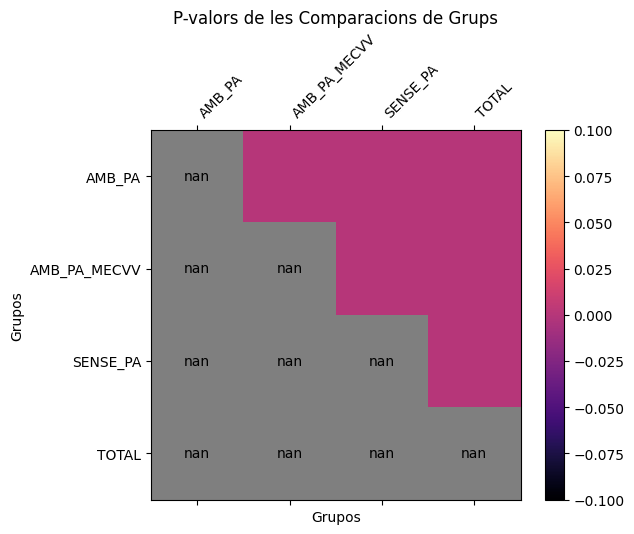

In [15]:
# TODO: Jaume revisar 
test_indepe_bin_plot({'AMB_PA': AMB_PA['DO diagnosticada'], 'AMB_PA_MECVV': AMB_PA_MECVV['DO diagnosticada'], 'SENSE_PA': SENSE_PA['DO diagnosticada'], 'TOTAL': TOTAL['DO diagnosticada']})

Al ser una variable categòrica no té sentit comprovar la seva normalitat. Realitzaré directament el test Xi-quadrat

## Index de Barthel

### Mitjana

In [ ]:
Mitjana_barthel = AMB_PA['Barthel resultats'].mean()
desviacio_estandard_barthel = AMB_PA['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

In [ ]:
Mitjana_barthel = AMB_PA_MECVV['Barthel resultats'].mean()
desviacio_estandard_barthel = AMB_PA_MECVV['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

In [ ]:
Mitjana_barthel = SENSE_PA['Barthel resultats'].mean()
desviacio_estandard_barthel = SENSE_PA['Barthel resultats'].std()

resultat = f"{Mitjana_barthel:.2f} ± {desviacio_estandard_barthel:.2f}"
print("Mitjana ± Desviació Estàndard del Barthel:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

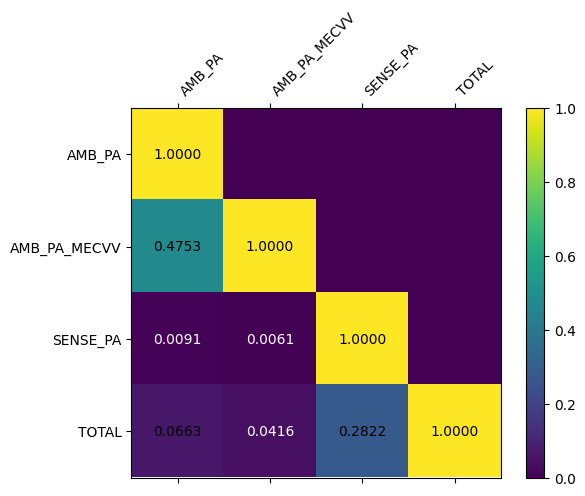

In [14]:
test_indepe_plot({'AMB_PA': AMB_PA['Barthel resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Barthel resultats'], 'SENSE_PA': SENSE_PA['Barthel resultats'], 'TOTAL': TOTAL['Barthel resultats']})

### Valors de dependència

##### AMB_PA

In [ ]:
indepe_AMB_PA = (AMB_PA['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_AMB_PA: {indepe_AMB_PA:.2f}%")

In [ ]:
mod_AMB_PA = (AMB_PA['Barthel resultats'].between(61, 95)).mean() * 100
print(f"Percentatge de mod_AMB_PA: {mod_AMB_PA:.2f}%")

In [ ]:
sev_AMB_PA = (AMB_PA['Barthel resultats'].between(21, 60)).mean() * 100
print(f"Percentatge de sev_AMB_PA: {sev_AMB_PA:.2f}%")

In [ ]:
total_AMB_PA = (AMB_PA['Barthel resultats'] <= 20.0 ).mean() * 100
print(f"Percentatge de total_AMB_PA: {total_AMB_PA:.2f}%")

##### AMB_PA_MECVV

In [ ]:
indepe_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_AMB_PA_MECVV: {indepe_AMB_PA_MECVV:.2f}%")

In [ ]:
mod_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'].between(61,95)).mean() * 100
print(f"Percentatge de mod_AMB_PA_MECVV: {mod_AMB_PA_MECVV:.2f}%")

In [ ]:
sev_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'].between(21,60)).mean() * 100
print(f"Percentatge de sev_AMB_PA_MECVV: {sev_AMB_PA_MECVV:.2f}%")

In [ ]:
total_AMB_PA_MECVV = (AMB_PA_MECVV['Barthel resultats'] <= 20.0).mean() * 100
print(f"Percentatge de total_AMB_PA_MECVV: {total_AMB_PA_MECVV:.2f}%")

##### SENSE_PA

In [ ]:
indepe_SENSE_PA = (SENSE_PA['Barthel resultats'] == 100.0).mean() * 100
print(f"Percentatge de indepe_SENSE_PA: {indepe_SENSE_PA:.2f}%")

In [ ]:
mod_SENSE_PA = (SENSE_PA['Barthel resultats'].between(61,95)).mean() * 100
print(f"Percentatge de mod_SENSE_PA: {mod_SENSE_PA:.2f}%")

In [ ]:
sev_SENSE_PA = (SENSE_PA['Barthel resultats'].between(21,60)).mean() * 100
print(f"Percentatge de sev_SENSE_PA: {sev_SENSE_PA:.2f}%")

In [ ]:
total_SENSE_PA = (SENSE_PA['Barthel resultats'] <= 20).mean() * 100
print(f"Percentatge de total_SENSE_PA: {total_SENSE_PA:.2f}%")

#### P-valor

##### Independència

In [ ]:
test_indepe_bin_plot({'AMB_PA': AMB_PA['Barthel resultats'], 'AMB_PA_MECVV': AMB_PA_MECVV['Barthel resultats'], 'SENSE_PA': SENSE_PA['Barthel resultats'], 'TOTAL': TOTAL['Barthel resultats']})
filter_func = lambda x: x == 100

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=SENSE_PA['Barthel resultats'] == 100.0)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] == 100.0, columns=SENSE_PA['Barthel resultats'] == 100.0)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions Barthel en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'] == 100.0, columns=TOTAL['Barthel resultats'] == 100.0)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

##### Moderada

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=AMB_PA_MECVV['Barthel resultats'].between(61, 95))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=SENSE_PA['Barthel resultats'].between(61, 95))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(61, 95), columns=SENSE_PA['Barthel resultats'].between(61, 95))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'].between(61, 95), columns=TOTAL['Barthel resultats'].between(61, 95))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

##### Severa

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=AMB_PA_MECVV['Barthel resultats'].between(21,60))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=SENSE_PA['Barthel resultats'].between(21,60))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(21,60), columns=SENSE_PA['Barthel resultats'].between(21,60))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'].between(21,60), columns=TOTAL['Barthel resultats'].between(21,60))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

##### Total

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=AMB_PA_MECVV['Barthel resultats'] <= 20.0)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=SENSE_PA['Barthel resultats'] <= 20.0)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] <= 20.0, columns=SENSE_PA['Barthel resultats'] <= 20.0)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Barthel resultats'] <= 20.0, columns=TOTAL['Barthel resultats'] <= 20.0)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de Barthel en SENSE_PA i TOTAL.")

## Index del MNA

Primer convertiré la columna a tipus numèric ja que els valors que conté són de tipus objecte i amb aquest tipus no puc calcular la mitjana ni la desviació estàndard.

In [ ]:
AMB_PA.loc[:, 'MNA resultats'] = pd.to_numeric(AMB_PA['MNA resultats'], errors='coerce')
AMB_PA_MECVV.loc[:, 'MNA resultats'] = pd.to_numeric(AMB_PA_MECVV['MNA resultats'], errors='coerce')
SENSE_PA.loc[:, 'MNA resultats'] = pd.to_numeric(SENSE_PA['MNA resultats'], errors='coerce')
TOTAL.loc[:, 'MNA resultats'] = pd.to_numeric(TOTAL['MNA resultats'], errors='coerce')

### Mitjana

In [ ]:
Mitjana_mna = AMB_PA['MNA resultats'].mean()
desviacio_estandard_mna = AMB_PA['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estándard del mna:", resultat)

In [ ]:
Mitjana_mna = AMB_PA_MECVV['MNA resultats'].mean()
desviacio_estandard_mna = AMB_PA_MECVV['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estándard del mna:", resultat)

In [ ]:
Mitjana_mna = SENSE_PA['MNA resultats'].mean()
desviacio_estandard_mna = SENSE_PA['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estàndard del mna:", resultat)

In [ ]:
Mitjana_mna = TOTAL['MNA resultats'].mean()
desviacio_estandard_mna = TOTAL['MNA resultats'].std()

resultat = f"{Mitjana_mna:.2f} ± {desviacio_estandard_mna:.2f}"
print("Mitjana ± Desviació Estàndard del mna:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [ ]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['MNA resultats'], AMB_PA_MECVV['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

In [ ]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['MNA resultats'], SENSE_PA['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

In [ ]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['MNA resultats'], SENSE_PA['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

In [ ]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

In [ ]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

In [ ]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['MNA resultats'], TOTAL['MNA resultats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

### Valors de malnutrició

##### AMB_PA

In [ ]:
norm_AMB_PA = AMB_PA['MNA resultats'].between(24, 30)
Percentatge_norm_AMB_PA = norm_AMB_PA.mean() * 100
num_observaciones_norm_AMB_PA = norm_AMB_PA.sum()

print(f"Percentatge de norm_AMB_PA: {Percentatge_norm_AMB_PA:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA: {num_observaciones_norm_AMB_PA}")

In [ ]:
malnutr_AMB_PA = AMB_PA['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_AMB_PA = malnutr_AMB_PA.mean() * 100
num_observacions_malnutr_AMB_PA = norm_AMB_PA.sum()

print(f"Percentatge de malnutr_AMB_PA: {Percentatge_malnutr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA: {num_observacions_malnutr_AMB_PA}")

In [ ]:
malnut_AMB_PA = AMB_PA['MNA resultats'] < 17
Percentatge_malnut_AMB_PA = malnut_AMB_PA.mean() * 100
num_observacions_malnut_AMB_PA = malnut_AMB_PA.sum()

print(f"Percentatge de malnut_AMB_PA: {Percentatge_malnut_AMB_PA:.2f}%")
print(f"Nombre d'observacions en malnut_AMB_PA: {num_observacions_malnut_AMB_PA}")

##### AMB_PA_MECVV

In [ ]:
norm_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'].between(24, 30)
Percentatge_norm_AMB_PA_MECVV = norm_AMB_PA_MECVV.mean() * 100
num_observacions_norm_AMB_PA_MECVV = norm_AMB_PA_MECVV.sum()

print(f"Percentatge de norm_AMB_PA_MECVV: {Percentatge_norm_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA_MECVV: {num_observacions_norm_AMB_PA_MECVV}")

In [ ]:
malnutr_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_AMB_PA_MECVV = malnutr_AMB_PA_MECVV.mean() * 100
num_observacions_malnutr_AMB_PA_MECVV = norm_AMB_PA_MECVV.sum()

print(f"Percentatge de malnutr_AMB_PA_MECVV: {Percentatge_malnutr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en norm_AMB_PA_MECVV: {num_observacions_malnutr_AMB_PA_MECVV}")

In [ ]:
malnut_AMB_PA_MECVV = AMB_PA_MECVV['MNA resultats'] < 17
Percentatge_malnut_AMB_PA_MECVV = malnut_AMB_PA_MECVV.mean() * 100
num_observacions_malnut_AMB_PA_MECVV = malnut_AMB_PA_MECVV.sum()

print(f"Percentatge de malnut_AMB_PA_MECVV: {Percentatge_malnut_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en malnut_AMB_PA_MECVV: {num_observacions_malnut_AMB_PA_MECVV}")

##### SENSE_PA

In [ ]:
norm_SENSE_PA = SENSE_PA['MNA resultats'].between(24, 30)
Percentatge_norm_SENSE_PA = norm_SENSE_PA.mean() * 100
num_observacions_norm_SENSE_PA = norm_SENSE_PA.sum()

print(f"Percentatge de norm_SENSE_PA: {Percentatge_norm_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en norm_SENSE_PA: {num_observacions_norm_SENSE_PA}")

In [ ]:
malnutr_SENSE_PA = SENSE_PA['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_SENSE_PA = malnutr_SENSE_PA.mean() * 100
num_observacions_malnutr_SENSE_PA = malnutr_SENSE_PA.sum()

print(f"Percentatge de malnutr_SENSE_PA: {Percentatge_malnutr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en malnutr_SENSE_PA: {num_observacions_malnutr_SENSE_PA}")

In [ ]:
malnut_SENSE_PA = SENSE_PA['MNA resultats'] < 17
Percentatge_malnut_SENSE_PA = malnut_SENSE_PA.mean() * 100
num_observacions_malnut_SENSE_PA = malnut_SENSE_PA.sum()

print(f"Percentatge de malnut_SENSE_PA: {Percentatge_malnut_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en malnut_SENSE_PA: {num_observacions_malnut_SENSE_PA}")

##### TOTAL

In [ ]:
norm_TOTAL = TOTAL['MNA resultats'].between(24, 30)
Percentatge_norm_TOTAL = norm_TOTAL.mean() * 100
num_observacions_norm_TOTAL = norm_TOTAL.sum()

print(f"Percentatge de norm_TOTAL: {Percentatge_norm_TOTAL:.2f}%")
print(f"Nombre d'observacions en norm_TOTAL: {num_observacions_norm_TOTAL}")

In [ ]:
malnutr_TOTAL = TOTAL['MNA resultats'].between(17, 23.5)
Percentatge_malnutr_TOTAL = malnutr_TOTAL.mean() * 100
num_observacions_malnutr_TOTAL = malnutr_TOTAL.sum()

print(f"Percentatge de malnutr_TOTAL: {Percentatge_malnutr_TOTAL:.2f}%")
print(f"Nombre d'observacions en malnutr_TOTAL: {num_observacions_malnutr_TOTAL}")

In [ ]:
malnut_TOTAL = TOTAL['MNA resultats'] < 17
Percentatge_malnut_TOTAL = malnut_TOTAL.mean() * 100
num_observacions_malnut_TOTAL = malnut_TOTAL.sum()

print(f"Percentatge de malnut_TOTAL: {Percentatge_malnut_TOTAL:.2f}%")
print(f"Nombre d'observacions en malnut_TOTAL: {num_observacions_malnut_TOTAL}")

#### P-valor

##### Normal

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=AMB_PA_MECVV['MNA resultats'].between(24, 30))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=SENSE_PA['MNA resultats'].between(24, 30))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(24, 30), columns=SENSE_PA['MNA resultats'].between(24, 30))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'].between(24, 30), columns=TOTAL['MNA resultats'].between(24, 30))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

##### Risc de malnutrició

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=AMB_PA_MECVV['MNA resultats'].between(17, 23.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=SENSE_PA['MNA resultats'].between(17, 23.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(17, 23.5), columns=SENSE_PA['MNA resultats'].between(17, 23.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'].between(17, 23.5), columns=TOTAL['MNA resultats'].between(17, 23.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

##### Malnutrició

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=AMB_PA_MECVV['MNA resultats'] < 17)

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=SENSE_PA['MNA resultats'] < 17)

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'] < 17, columns=SENSE_PA['MNA resultats'] < 17)

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['MNA resultats'] < 17, columns=TOTAL['MNA resultats'] < 17)

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de MNA en SENSE_PA i TOTAL.")

## Index de l'EMINA

### Mitjana

In [ ]:
Mitjana_emina = AMB_PA['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = AMB_PA['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = AMB_PA_MECVV['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = AMB_PA_MECVV['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = SENSE_PA['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = SENSE_PA['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

In [ ]:
Mitjana_emina = TOTAL['EMINA sumatoris comparats'].mean()
desviacio_estandard_emina = TOTAL['EMINA sumatoris comparats'].std()

resultat = f"{Mitjana_emina:.2f} ± {desviacio_estandard_emina:.2f}"
print("Mitjana ± Desviació Estàndard de l'emina:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [ ]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], AMB_PA_MECVV['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

In [ ]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], SENSE_PA['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

In [ ]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['EMINA sumatoris comparats'], SENSE_PA['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

In [ ]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

In [ ]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

In [ ]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['EMINA sumatoris comparats'], TOTAL['EMINA sumatoris comparats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

### Valors EMINA

##### AMB_PA

In [ ]:
lowr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_AMB_PA = lowr_AMB_PA.mean() * 100
num_observacions_lowr_AMB_PA = lowr_AMB_PA.sum()

print(f"Percentatge de lowr_AMB_PA: {Percentatge_lowr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en lowr_AMB_PA: {num_observacions_lowr_AMB_PA}")

In [ ]:
modr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_AMB_PA = modr_AMB_PA.mean() * 100
num_observacions_modr_AMB_PA = modr_AMB_PA.sum()

print(f"Percentatge de modr_AMB_PA: {Percentatge_modr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en modr_AMB_PA: {num_observacions_modr_AMB_PA}")

In [ ]:
highr_AMB_PA = AMB_PA['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_AMB_PA = highr_AMB_PA.mean() * 100
num_observacions_highr_AMB_PA = highr_AMB_PA.sum()

print(f"Percentatge de highr_AMB_PA: {Percentatge_highr_AMB_PA:.2f}%")
print(f"Nombre d'observacions en highr_AMB_PA: {num_observacions_highr_AMB_PA}")

##### AMB_PA_MECVV

In [ ]:
lowr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_AMB_PA_MECVV = lowr_AMB_PA_MECVV.mean() * 100
num_observacions_lowr_AMB_PA_MECVV = lowr_AMB_PA_MECVV.sum()

print(f"Percentatge de lowr_AMB_PA_MECVV: {Percentatge_lowr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en lowr_AMB_PA_MECVV: {num_observacions_lowr_AMB_PA_MECVV}")

In [ ]:
modr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_AMB_PA_MECVV = modr_AMB_PA_MECVV.mean() * 100
num_observacions_modr_AMB_PA_MECVV = modr_AMB_PA_MECVV.sum()

print(f"Percentatge de modr_AMB_PA_MECVV: {Percentatge_modr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en modr_AMB_PA_MECVV: {num_observacions_modr_AMB_PA_MECVV}")

In [ ]:
highr_AMB_PA_MECVV = AMB_PA_MECVV['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_AMB_PA_MECVV = highr_AMB_PA_MECVV.mean() * 100
num_observacions_highr_AMB_PA_MECVV = highr_AMB_PA_MECVV.sum()

print(f"Percentatge de highr_AMB_PA_MECVV: {Percentatge_highr_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en highr_AMB_PA_MECVV: {num_observacions_highr_AMB_PA_MECVV}")

##### SENSE_PA

In [ ]:
lowr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_SENSE_PA = lowr_SENSE_PA.mean() * 100
num_observacions_lowr_SENSE_PA = lowr_SENSE_PA.sum()

print(f"Percentatge de lowr_SENSE_PA: {Percentatge_lowr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en lowr_SENSE_PA: {num_observacions_lowr_SENSE_PA}")

In [ ]:
modr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_SENSE_PA = modr_SENSE_PA.mean() * 100
num_observacions_modr_SENSE_PA = modr_SENSE_PA.sum()

print(f"Percentatge de modr_SENSE_PA: {Percentatge_modr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en modr_SENSE_PA: {num_observacions_modr_SENSE_PA}")

In [ ]:
highr_SENSE_PA = SENSE_PA['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_SENSE_PA = highr_SENSE_PA.mean() * 100
num_observacions_highr_SENSE_PA = highr_SENSE_PA.sum()

print(f"Percentatge de highr_SENSE_PA: {Percentatge_highr_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en highr_SENSE_PA: {num_observacions_highr_SENSE_PA}")

##### TOTAL

In [ ]:
lowr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(0, 5)
Percentatge_lowr_TOTAL = lowr_TOTAL.mean() * 100
num_observacions_lowr_TOTAL = lowr_TOTAL.sum()

print(f"Percentatge de lowr_TOTAL: {Percentatge_lowr_TOTAL:.2f}%")
print(f"Nombre d'observacions en lowr_TOTAL: {num_observacions_lowr_TOTAL}")

In [ ]:
modr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(6, 10)
Percentatge_modr_TOTAL = modr_TOTAL.mean() * 100
num_observacions_modr_TOTAL = modr_TOTAL.sum()

print(f"Percentatge de modr_TOTAL: {Percentatge_modr_TOTAL:.2f}%")
print(f"Nombre d'observacions en modr_TOTAL: {num_observacions_modr_TOTAL}")

In [ ]:
highr_TOTAL = TOTAL['EMINA sumatoris comparats'].between(11, 15)
Percentatge_highr_TOTAL = highr_TOTAL.mean() * 100
num_observacions_highr_TOTAL = highr_TOTAL.sum()

print(f"Percentatge de highr_TOTAL: {Percentatge_highr_TOTAL:.2f}%")
print(f"Nombre d'observacions en highr_TOTAL: {num_observacions_highr_TOTAL}")

#### P-valor

##### Risc baix

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=SENSE_PA['EMINA sumatoris comparats'].between(0,5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5), columns=SENSE_PA['EMINA sumatoris comparats'].between(0,5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(0,5), columns=TOTAL['EMINA sumatoris comparats'].between(0,5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

##### Risc moderat

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=SENSE_PA['EMINA sumatoris comparats'].between(6,10))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10), columns=SENSE_PA['EMINA sumatoris comparats'].between(6,10))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(6,10), columns=TOTAL['EMINA sumatoris comparats'].between(6,10))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

##### Risc alt

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=SENSE_PA['EMINA sumatoris comparats'].between(11,15))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15), columns=SENSE_PA['EMINA sumatoris comparats'].between(11,15))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['EMINA sumatoris comparats'].between(11,15), columns=TOTAL['EMINA sumatoris comparats'].between(11,15))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'EMINA en SENSE_PA i TOTAL.")

## Index de la canadenca (escala neurològica canadenca)

### Mitjana

In [ ]:
Mitjana_canad = AMB_PA['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = AMB_PA['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

In [ ]:
Mitjana_canad = AMB_PA_MECVV['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = AMB_PA_MECVV['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

In [ ]:
Mitjana_canad = SENSE_PA['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = SENSE_PA['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

In [ ]:
Mitjana_canad = TOTAL['Canadenca sumatoris comparats'].mean()
desviacio_estandard_canad = TOTAL['Canadenca sumatoris comparats'].std()

resultat = f"{Mitjana_canad:.2f} ± {desviacio_estandard_canad:.2f}"
print("Mitjana ± Desviació Estàndard de la canadenca:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Tots els grups segueixen una distribució normal

In [ ]:
t_stat_12, p_val_12 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], AMB_PA_MECVV['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_val_12)

In [ ]:
t_stat_13, p_val_13 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], SENSE_PA['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i SENSE_PA:", p_val_13)

In [ ]:
t_stat_23, p_val_23 = ttest_ind(AMB_PA_MECVV['Canadenca sumatoris comparats'], SENSE_PA['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_val_23)

In [ ]:
t_stat_14, p_val_14 = ttest_ind(AMB_PA['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA i TOTAL:", p_val_14)

In [ ]:
t_stat_24, p_val_24 = ttest_ind(AMB_PA_MECVV['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_val_24)

In [ ]:
t_stat_34, p_val_34 = ttest_ind(SENSE_PA['Canadenca sumatoris comparats'], TOTAL['Canadenca sumatoris comparats'], equal_var=False)
print("P-valor entre SENSE_PA i TOTAL:", p_val_34)

### Valors canadenca

##### AMB_PA 

In [ ]:
mild_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_AMB_PA = mild_AMB_PA.mean() * 100
num_observacions_mild_AMB_PA = mild_AMB_PA.sum()

print(f"Percentatge de mild_AMB_PA: {Percentatge_mild_AMB_PA:.2f}%")
print(f"Nombre d'observacions en mild_AMB_PA: {num_observacions_mild_AMB_PA}")

In [ ]:
modneu_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_AMB_PA = modneu_AMB_PA.mean() * 100
num_observacions_modneu_AMB_PA = modneu_AMB_PA.sum()

print(f"Percentatge de modneu_AMB_PA: {Percentatge_modneu_AMB_PA:.2f}%")
print(f"Nombre d'observacions en modneu_AMB_PA: {num_observacions_modneu_AMB_PA}")

In [ ]:
sevneu_AMB_PA = AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_AMB_PA = sevneu_AMB_PA.mean() * 100
num_observacions_sevneu_AMB_PA = sevneu_AMB_PA.sum()

print(f"Percentatge de sevneu_AMB_PA: {Percentatge_sevneu_AMB_PA:.2f}%")
print(f"Nombre d'observacions en sevneu_AMB_PA: {num_observacions_sevneu_AMB_PA}")

##### AMB_PA_MECVV

In [ ]:
mild_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_AMB_PA_MECVV = mild_AMB_PA_MECVV.mean() * 100
num_observacions_mild_AMB_PA_MECVV = mild_AMB_PA_MECVV.sum()

print(f"Percentatge de mild_AMB_PA_MECVV: {Percentatge_mild_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en mild_AMB_PA_MECVV: {num_observacions_mild_AMB_PA_MECVV}")

In [ ]:
modneu_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_AMB_PA_MECVV = modneu_AMB_PA_MECVV.mean() * 100
num_observacions_modneu_AMB_PA_MECVV = modneu_AMB_PA_MECVV.sum()

print(f"Percentatge de modneu_AMB_PA_MECVV: {Percentatge_modneu_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en modneu_AMB_PA_MECVV: {num_observacions_modneu_AMB_PA_MECVV}")

In [ ]:
sevneu_AMB_PA_MECVV = AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_AMB_PA_MECVV = sevneu_AMB_PA_MECVV.mean() * 100
num_observacions_sevneu_AMB_PA_MECVV = sevneu_AMB_PA_MECVV.sum()

print(f"Percentatge de sevneu_AMB_PA_MECVV: {Percentatge_sevneu_AMB_PA_MECVV:.2f}%")
print(f"Nombre d'observacions en sevneu_AMB_PA_MECVV: {num_observacions_sevneu_AMB_PA_MECVV}")

##### SENSE_PA

In [ ]:
mild_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_SENSE_PA = mild_SENSE_PA.mean() * 100
num_observacions_mild_SENSE_PA = mild_SENSE_PA.sum()

print(f"Percentatge de mild_SENSE_PA: {Percentatge_mild_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en mild_SENSE_PA: {num_observacions_mild_SENSE_PA}")

In [ ]:
modneu_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_SENSE_PA = modneu_SENSE_PA.mean() * 100
num_observacions_modneu_SENSE_PA = modneu_SENSE_PA.sum()

print(f"Percentatge de modneu_SENSE_PA: {Percentatge_modneu_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en modneu_SENSE_PA: {num_observacions_modneu_SENSE_PA}")

In [ ]:
sevneu_SENSE_PA = SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_SENSE_PA = sevneu_SENSE_PA.mean() * 100
num_observacions_sevneu_SENSE_PA = sevneu_SENSE_PA.sum()

print(f"Percentatge de sevneu_SENSE_PA: {Percentatge_sevneu_SENSE_PA:.2f}%")
print(f"Nombre d'observacions en sevneu_SENSE_PA: {num_observacions_sevneu_SENSE_PA}")

##### TOTAL

In [ ]:
mild_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(10.5, 11.5)
Percentatge_mild_TOTAL = mild_TOTAL.mean() * 100
num_observacions_mild_TOTAL = mild_TOTAL.sum()

print(f"Percentatge de mild_TOTAL: {Percentatge_mild_TOTAL:.2f}%")
print(f"Nombre d'observacions en mild_TOTAL: {num_observacions_mild_TOTAL}")

In [ ]:
modneu_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(5,10)
Percentatge_modneu_TOTAL = modneu_TOTAL.mean() * 100
num_observacions_modneu_TOTAL = modneu_TOTAL.sum()

print(f"Percentatge de modneu_TOTAL: {Percentatge_modneu_TOTAL:.2f}%")
print(f"Nombre d'observacions en modneu_TOTAL: {num_observacions_modneu_TOTAL}")

In [ ]:
sevneu_TOTAL = TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5)
Percentatge_sevneu_TOTAL = sevneu_TOTAL.mean() * 100
num_observacions_sevneu_TOTAL = sevneu_TOTAL.sum()

print(f"Percentatge de sevneu_TOTAL: {Percentatge_sevneu_TOTAL:.2f}%")
print(f"Nombre d'observacions en sevneu_TOTAL: {num_observacions_sevneu_TOTAL}")

#### P-valor

##### Dèficit neurològic lleuger (mild)

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")


In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(10.5,11.5), columns=TOTAL['Canadenca sumatoris comparats'].between(10.5,11.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

##### Dèficit neurològic moderat

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=SENSE_PA['Canadenca sumatoris comparats'].between(5,10))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10), columns=SENSE_PA['Canadenca sumatoris comparats'].between(5,10))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(5,10), columns=TOTAL['Canadenca sumatoris comparats'].between(5,10))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

##### Dèficit neurològic greu (sever)

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
   print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")
else:
   print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Canadenca sumatoris comparats'].between(1.5, 4.5), columns=TOTAL['Canadenca sumatoris comparats'].between(1.5, 4.5))

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de canadenca en SENSE_PA i TOTAL.")

## Infeccions respiratòries

##### AMB_PA 

In [ ]:
mainresp_AMB_PA= (AMB_PA['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_AMB_PA:.2f}%")

In [ ]:
LRTI_AMB_PA= (AMB_PA['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_AMB_PA:.2f}%")

In [ ]:
COPD_AMB_PA= (AMB_PA['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_AMB_PA:.2f}%")

In [ ]:
fibro_AMB_PA= (AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_AMB_PA:.2f}%")

##### AMB_PA_MECVV

In [ ]:
mainresp_AMB_PA_MECVV= (AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_AMB_PA_MECVV:.2f}%")

In [ ]:
LRTI_AMB_PA_MECVV= (AMB_PA_MECVV['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_AMB_PA_MECVV:.2f}%")

In [ ]:
COPD_AMB_PA_MECVV = (AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_AMB_PA_MECVV:.2f}%")

In [ ]:
fibro_AMB_PA_MECVV = (AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_AMB_PA_MECVV:.2f}%")

##### SENSE_PA

In [ ]:
mainresp_SENSE_PA= (SENSE_PA['Infeccions respiratòries principals diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de infeccions respiratòries principals : {mainresp_SENSE_PA:.2f}%")

In [ ]:
LRTI_SENSE_PA= (SENSE_PA['LRTI diagnosticada'] == 1.0).mean() * 100
print(f"Percentatge de LRTI: {LRTI_SENSE_PA:.2f}%")

In [ ]:
COPD_SENSE_PA= (SENSE_PA['Exacerbacions de COPD diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de exacerbacions de COPD: {COPD_SENSE_PA:.2f}%")

In [ ]:
fibro_SENSE_PA= (SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'] == 1.0).mean() * 100
print(f"Percentatge de fibrosi pulmonar i fibrotòrax: {fibro_SENSE_PA:.2f}%")

#### Comparació distributiva

##### Normalitat i p-valor

No cal calcular la normalitat ja que totes són variables categòriques

##### Infeccions respiratòries principals

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=SENSE_PA['Infeccions respiratòries principals diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'], columns=SENSE_PA['Infeccions respiratòries principals diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_14)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Infeccions respiratòries principals diagnosticades'], columns=TOTAL['Infeccions respiratòries principals diagnosticades'])

chi2_34, p_value_34, dof_4, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre AMB_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'infeccions respiratòries en SENSE_PA i TOTAL.")

##### LRTI

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=AMB_PA_MECVV['LRTI diagnosticada'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=SENSE_PA['LRTI diagnosticada'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['LRTI diagnosticada'], columns=SENSE_PA['LRTI diagnosticada'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['LRTI diagnosticada'], columns=TOTAL['LRTI diagnosticada'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SNESE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de LRTI en SENSE_PA i TOTAL.")

##### Exacerbacions de COPD

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECV.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=SENSE_PA['Exacerbacions de COPD diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'], columns=SENSE_PA['Exacerbacions de COPD diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Exacerbacions de COPD diagnosticades'], columns=TOTAL['Exacerbacions de COPD diagnosticades'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions d'exacerbacions de COPD en SENSE_PA i TOTAL.")

##### Fibrosi pulmonar i fibrotòrax

In [ ]:
contingency_table_12 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_12, p_value_12, dof_12, expected_12 = chi2_contingency(contingency_table_12)

print("Estadístic xi-quadrat entre AMB_PA i AMB_PA_MECVV:", chi2_12)
print("P-valor entre AMB_PA i AMB_PA_MECVV:", p_value_12)

if p_value_12 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i AMB_PA_MECVV.")

In [ ]:
contingency_table_13 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_13, p_value_13, dof_13, expected_13 = chi2_contingency(contingency_table_13)

print("Estadístic xi-quadrat entre AMB_PA i SENSE_PA:", chi2_13)
print("P-valor entre AMB_PA i SENSE_PA:", p_value_13)

if p_value_13 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i SENSE_PA.")

In [ ]:
contingency_table_23 = pd.crosstab(index=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_23, p_value_23, dof_23, expected_23 = chi2_contingency(contingency_table_23)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i SENSE_PA:", chi2_23)
print("P-valor entre AMB_PA_MECVV i SENSE_PA:", p_value_23)

if p_value_23 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i SENSE_PA.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i SENSE_PA.")

In [ ]:
contingency_table_14 = pd.crosstab(index=AMB_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_14, p_value_14, dof_14, expected_14 = chi2_contingency(contingency_table_14)

print("Estadístic xi-quadrat entre AMB_PA i TOTAL:", chi2_14)
print("P-valor entre AMB_PA i TOTAL:", p_value_14)

if p_value_14 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA i TOTAL.")

In [ ]:
contingency_table_24 = pd.crosstab(index=AMB_PA_MECVV['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_24, p_value_24, dof_24, expected_24 = chi2_contingency(contingency_table_24)

print("Estadístic xi-quadrat entre AMB_PA_MECVV i TOTAL:", chi2_24)
print("P-valor entre AMB_PA_MECVV i TOTAL:", p_value_24)

if p_value_24 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en AMB_PA_MECVV i TOTAL.")

In [ ]:
contingency_table_34 = pd.crosstab(index=SENSE_PA['Fibrosi pulmonar i fibrotòrax diagnosticades'], columns=TOTAL['Fibrosi pulmonar i fibrotòrax diagnosticades'])

chi2_34, p_value_34, dof_34, expected_34 = chi2_contingency(contingency_table_34)

print("Estadístic xi-quadrat entre SENSE_PA i TOTAL:", chi2_34)
print("P-valor entre SENSE_PA i TOTAL:", p_value_34)

if p_value_34 < 0.05:
    print("Hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.")
else:
    print("No hi ha diferències significatives entre les distribucions de fibrosi pulmonar i fibrotòrax en SENSE_PA i TOTAL.")

## Resultats de laboratori

Les columnes generades a partir d'aquests resultats contenen valors tipus objecte, per tant, primer els transformaré a tipus numèric per poder realitzar les operacions que neccessitaré fer.

### Albúmina

In [ ]:
AMB_PA.loc[:, 'Albúmina'] = pd.to_numeric(AMB_PA['Albúmina'], errors='coerce').dropna()

Mitjana_alb = AMB_PA['Albúmina'].mean()
desviacio_estandard_alb = AMB_PA['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

In [ ]:
AMB_PA_MECVV.loc[:, 'Albúmina'] = pd.to_numeric(AMB_PA_MECVV['Albúmina'], errors='coerce').dropna()

Mitjana_alb = AMB_PA_MECVV['Albúmina'].mean()
desviacio_estandard_alb = AMB_PA_MECVV['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

In [ ]:
SENSE_PA.loc[:, 'Albúmina'] = pd.to_numeric(SENSE_PA['Albúmina'], errors='coerce').dropna()

Mitjana_alb = SENSE_PA['Albúmina'].mean()
desviacio_estandard_alb = SENSE_PA['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

In [ ]:
TOTAL.loc[:, 'Albúmina'] = pd.to_numeric(TOTAL['Albúmina'], errors='coerce').dropna()

Mitjana_alb = TOTAL['Albúmina'].mean()
desviacio_estandard_alb = TOTAL['Albúmina'].std()

resultat = f"{Mitjana_alb:.2f} ± {desviacio_estandard_alb:.2f}"
print("Mitjana ± Desviació Estàndard de l'albúmina:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Albumin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Albumin'], 'SENSE_PA': SENSE_PA['Albumin'], 'TOTAL': TOTAL['Albumin']})

NORMALITAT: Els 4 grups segueixen una distribució normal

### Proteïnes totals

In [ ]:
AMB_PA.loc[:, 'Proteïnes totals'] = pd.to_numeric(AMB_PA['Proteïnes totals'], errors='coerce')

Mitjana_prot = AMB_PA['Proteïnes totals'].mean()
desviacio_estandard_prot = AMB_PA['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

In [ ]:
AMB_PA_MECVV.loc[:, 'Proteïnes totals'] = pd.to_numeric(AMB_PA_MECVV['Proteïnes totals'], errors='coerce')

Mitjana_prot = AMB_PA_MECVV['Proteïnes totals'].mean()
desviacio_estandard_prot = AMB_PA_MECVV['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

In [ ]:
SENSE_PA.loc[:, 'Proteïnes totals'] = pd.to_numeric(SENSE_PA['Proteïnes totals'], errors='coerce')

Mitjana_prot = SENSE_PA['Proteïnes totals'].mean()
desviacio_estandard_prot = SENSE_PA['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

In [ ]:
TOTAL.loc[:, 'Proteïnes totals'] = pd.to_numeric(TOTAL['Proteïnes totals'], errors='coerce')

Mitjana_prot = TOTAL['Proteïnes totals'].mean()
desviacio_estandard_prot = TOTAL['Proteïnes totals'].std()

resultat = f"{Mitjana_prot:.2f} ± {desviacio_estandard_prot:.2f}"
print("Mitjana ± Desviació Estàndard de les proteïnes totals:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Proteins'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Proteins'], 'SENSE_PA': SENSE_PA['Total Proteins'], 'TOTAL': TOTAL['Total Proteins']})

NORMALITAT: Els 4 grups segueixen una distribució normal

### Hemoglobina

In [ ]:
AMB_PA.loc[:, 'Hb'] = pd.to_numeric(AMB_PA['Hb'], errors='coerce')

Mitjana_hb = AMB_PA['Hb'].mean()
desviacio_estandard_hb = AMB_PA['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

In [ ]:
AMB_PA_MECVV.loc[:, 'Hb'] = pd.to_numeric(AMB_PA_MECVV['Hb'], errors='coerce')

Mitjana_hb = AMB_PA_MECVV['Hb'].mean()
desviacio_estandard_hb = AMB_PA_MECVV['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

In [ ]:
SENSE_PA.loc[:, 'Hb'] = pd.to_numeric(SENSE_PA['Hb'], errors='coerce')

Mitjana_hb = SENSE_PA['Hb'].mean()
desviacio_estandard_hb = SENSE_PA['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de l'hemoglobina:", resultat)

In [ ]:
TOTAL.loc[:, 'Hb'] = pd.to_numeric(TOTAL['Hb'], errors='coerce')

Mitjana_hb = TOTAL['Hb'].mean()
desviacio_estandard_hb = TOTAL['Hb'].std()

resultat = f"{Mitjana_hb:.2f} ± {desviacio_estandard_hb:.2f}"
print("Mitjana ± Desviació Estàndard de la hemoglobina:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

NORMALITAT: Els 4 grups segueixen una distribució normal

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Hemoglobin'], 'AMB_PA_MECVV': AMB_PA_MECVV['Hemoglobin'], 'SENSE_PA': SENSE_PA['Hemoglobin'], 'TOTAL': TOTAL['Hemoglobin']})

### Colesterol 

In [ ]:
AMB_PA.loc[:, 'Colesterol total'] = pd.to_numeric(AMB_PA['Colesterol total'], errors='coerce')

Mitjana_col = AMB_PA['Colesterol total'].mean()
desviacio_estandard_col = AMB_PA['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

In [ ]:
AMB_PA_MECVV.loc[:, 'Colesterol total'] = pd.to_numeric(AMB_PA_MECVV['Colesterol total'], errors='coerce')

Mitjana_col = AMB_PA_MECVV['Colesterol total'].mean()
desviacio_estandard_col = AMB_PA_MECVV['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

In [ ]:
SENSE_PA.loc[:, 'Colesterol total'] = pd.to_numeric(SENSE_PA['Colesterol total'], errors='coerce')

Mitjana_col = SENSE_PA['Colesterol total'].mean()
desviacio_estandard_col = SENSE_PA['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

In [ ]:
TOTAL.loc[:, 'Colesterol total'] = pd.to_numeric(TOTAL['Colesterol total'], errors='coerce')

Mitjana_col = TOTAL['Colesterol total'].mean()
desviacio_estandard_col = TOTAL['Colesterol total'].std()

resultat = f"{Mitjana_col:.2f} ± {desviacio_estandard_col:.2f}"
print("Mitjana ± Desviació Estàndard del colesterol total:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor



In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Total Cholesterol'], 'AMB_PA_MECVV': AMB_PA_MECVV['Total Cholesterol'], 'SENSE_PA': SENSE_PA['Total Cholesterol'], 'TOTAL': TOTAL['Total Cholesterol']})

NORMALITAT: Els 4 grups segueixen una distribució normal

### Leucòcits

In [ ]:
AMB_PA.loc[:, 'Leucos'] = pd.to_numeric(AMB_PA['Leucos'], errors='coerce')

Mitjana_leu = AMB_PA['Leucos'].mean()
desviacio_estandard_leu = AMB_PA['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

In [ ]:
AMB_PA_MECVV.loc[:, 'Leucos'] = pd.to_numeric(AMB_PA_MECVV['Leucos'], errors='coerce')

Mitjana_leu = AMB_PA_MECVV['Leucos'].mean()
desviacio_estandard_leu = AMB_PA_MECVV['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

In [ ]:
SENSE_PA.loc[:, 'Leucos'] = pd.to_numeric(SENSE_PA['Leucos'], errors='coerce')

Mitjana_leu = SENSE_PA['Leucos'].mean()
desviacio_estandard_leu = SENSE_PA['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

In [ ]:
TOTAL.loc[:, 'Leucos'] = pd.to_numeric(TOTAL['Leucos'], errors='coerce')

Mitjana_leu = TOTAL['Leucos'].mean()
desviacio_estandard_leu = TOTAL['Leucos'].std()

resultat = f"{Mitjana_leu:.2f} ± {desviacio_estandard_leu:.2f}"
print("Mitjana ± Desviació Estàndard dels leucòcits:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Leucocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Leucocytes'], 'SENSE_PA': SENSE_PA['Leucocytes'], 'TOTAL': TOTAL['Leucocytes']})

NORMALITAT: Els 4 grups segueixen una distribució normal

### Limfòcits %

In [ ]:
AMB_PA.loc[:, 'Limfos'] = pd.to_numeric(AMB_PA['Limfos'], errors='coerce')

Mitjana_limf = AMB_PA['Limfos'].mean()
desviacio_estandard_limf = AMB_PA['Limfos'].std()

resultat = f"{Mitjana_limf:.2f} ± {desviacio_estandard_limf:.2f}"
print("Mitjana ± Desviació Estàndard dels limfòcits %:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['Lymphocytes'], 'AMB_PA_MECVV': AMB_PA_MECVV['Lymphocytes'], 'SENSE_PA': SENSE_PA['Lymphocytes'], TOTAL: TOTAL['Lymphocytes']})

### Proteïna C Reactiva

In [ ]:
AMB_PA.loc[:, 'Prot C react'] = pd.to_numeric(AMB_PA['Prot C react'], errors='coerce')

Mitjana_protcr = AMB_PA['Prot C react'].mean()
desviacio_estandard_protcr = AMB_PA['Prot C react'].std()

resultat = f"{Mitjana_protcr:.2f} ± {desviacio_estandard_protcr:.2f}"
print("Mitjana ± Desviació Estàndard de la proteïna C reactiva:", resultat)

#### Comparació distributiva

##### Normalitat i p-valor

In [ ]:
test_indepe_plot({'AMB_PA': AMB_PA['C reactive protein'], 'AMB_PA_MECVV': AMB_PA_MECVV['C reactive protein'], 'SENSE_PA': SENSE_PA['C reactive protein'], 'TOTAL': TOTAL['C reactive protein']})

### Urea 

#### Comparació distributiva

##### Normalitat i p-valor

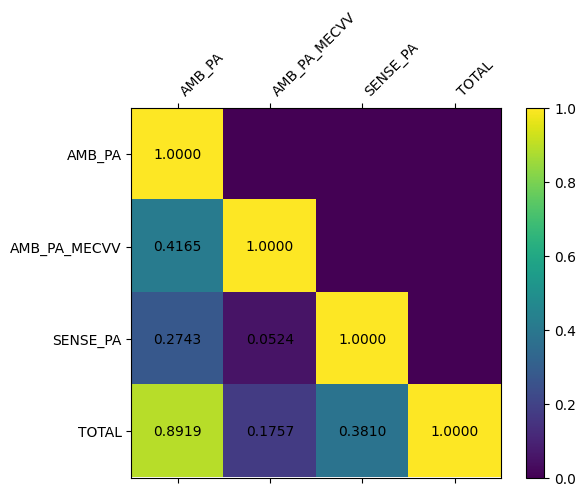

In [13]:
test_indepe_plot({'AMB_PA': AMB_PA['Urea'], 'AMB_PA_MECVV': AMB_PA_MECVV['Urea'], 'SENSE_PA': SENSE_PA['Urea'], 'TOTAL': TOTAL['Urea']})

### Filtrat glomerular

#### Comparació distributiva

##### Normalitat i p-valor

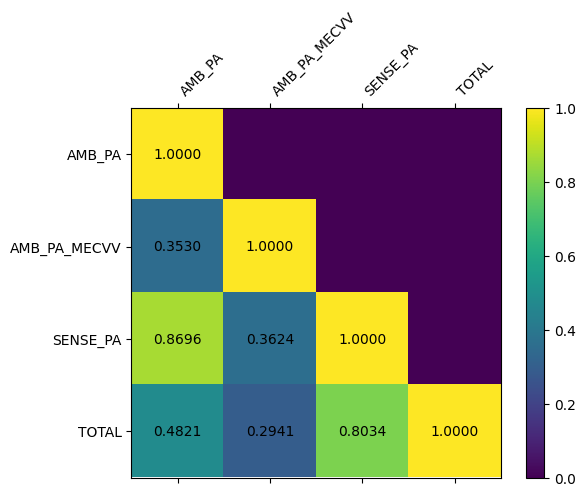

In [12]:
test_indepe_plot({'AMB_PA': AMB_PA['Glomerular Filtrate'], 'AMB_PA_MECVV': AMB_PA_MECVV['Glomerular Filtrate'], 'SENSE_PA': SENSE_PA['Glomerular Filtrate'], 'TOTAL': TOTAL['Glomerular Filtrate']})